# Hello, RISE

RISE is a jupyter extension that turns your Jupyter Notebook into a `reveal.js`-based presentation.

More about RISE [here](https://rise.readthedocs.io/en/maint-5.5/).

# About This Notebook

This is just a short demo of some basic data analysis & visualization in python using RISE.

I want to answer the question- based on my attendance, which type of talks did I prefer?

We'll demonstrate the following:

1. scraping the conferece web page to produce a data frame
1. enriching the conference data with my preference data
1. produce some visualizations to help answer the question

## Housekeeping

Deps for how I set up this notebook:
  1. install RISE for this pres mode `conda install -c conda-forge rise`
  2. install altair for data viz `conda install -c conda-forge altair vega_datasets notebook vega`
  3. install jupyter configurator to add RISE themes (among other things) `conda install -c conda-forge jupyter_nbextensions_configurator`
  4. install html parsing library `pip install requests-html`

In [21]:
# Hello, RISE!
print("Go ahead and change me!")

# Use pg dn (Mac: fn ↓)

Go ahead and change me!
# conda environments:
#
base                     /Users/alex.dixon/anaconda3
n-benchmark              /Users/alex.dixon/anaconda3/envs/n-benchmark
n-notebook               /Users/alex.dixon/anaconda3/envs/n-notebook
pybay-pres            *  /Users/alex.dixon/anaconda3/envs/pybay-pres



In [13]:
print("You found the sub-slide!")

You found the sub-slide!


In [3]:
# Try get html from pybay schedule page
# If this fails, go ahead ~5 slides to unpickle a saved dataframe
from requests_html import HTMLSession

session = HTMLSession()
pybay_schedule = session.get('https://pybay.com/schedule/')


In [4]:
# Define talk categories
talk_cats = dict()
for cat in pybay_schedule.html.find(".sch-filter-list", first=True).find('li'):
    if not cat.attrs["data-filter"].strip():
        continue
    talk_cats[cat.text.strip()] = cat.attrs["data-filter"]

talk_cats

{'Python & Libraries': 'python',
 'DevOps, Testing, & Automation': 'devops',
 'People & Project Management': 'community',
 'Scale & Performance': 'speed',
 'ML, AI, & Data': 'ai',
 'Web, IoT, & Hardware': 'web',
 'Beginner-friendly': 'level-1'}

In [5]:
# Parse schedule for talk information

import collections
talk_details = collections.namedtuple("TalkDetails", ["time", "title", "speaker", "categories", "description"])
talks = list()

def get_categories(cat_text: str) -> list:
    """
    Ex1: (ML, AI, & Data)
    Ex2: (DevOps, Testing, & Automation,
Web, IoT, & Hardware)
    """
    cats = cat_text.split("\n")
    cats = [cat.replace("(", "").replace(")", "") for cat in cats]
    cats = [cat[:-1] if cat.endswith(",") else cat for cat in cats]
    return [talk_cats[cat] for cat in cats]

for day in pybay_schedule.html.find(".sch-day"):
    if day.find(".sch-day-title", first=True).text not in {"Aug. 17, 2019", "Aug. 18, 2019"}:
        continue
    a = day.find(".sch-timeslots", first=True)
    b = a.find(".sch-timeslot")
    for timeslot in day.find(".sch-timeslots", first=True).find(".sch-timeslot"):
        if "sch-timeslot-special" in timeslot.attrs["class"]:
            continue  # skip things like check-in, breakfast, lunch, etc.
        time = timeslot.find(".sch-timeslot-time", first=True).text
        for talk in timeslot.find(".sch-timeslot-slots", first=True).find(".sch-timeslot-slot"):
            details = talk.find(".sch-slot-inner", first=True)
            title = details.find("h4 > a", first=True).text
            speaker = details.find("p.sch-speaker", first=True).text
            try:
                categories = get_categories(details.find("p.sch-category > span.small", first=True).text)
            except AttributeError:
                categories = []
            try:
                description = talk.find("div.sch-description > p", first = True).text
            except AttributeError:
                description = ""
            talks.append(talk_details(time, title, speaker, categories, description))
talks[0]

TalkDetails(time='9:40 a.m.', title='As We May Program', speaker='Peter Norvig', categories=['ai'], description='Innovations in machine learning are changing our perception of what is possible to do with a computer. But how will machine learning change the way we program, the tools we use, and the mix of tasks done by expert programmers, novice programmers, and non-programmers? This talk examines some possible futures.')

In [6]:
import pandas as pd

df = pd.DataFrame(data=talks)
df

,time,title,speaker,categories,description
0,9:40 a.m.,As We May Program,Peter Norvig,[ai],Innovations in machine learning are changing o...
1,10:15 a.m.,PEP 581 and PEP 588: Migrating CPython's Issue...,Mariatta .,[python],"In 2017, CPython codebase was moved to GitHub ..."
2,11:05 a.m.,What's Coming in 3.8? Assignment Expressions &...,Adam Forsyth,[python],"Curious what's coming next for Python? Well, P..."
3,11:05 a.m.,Unclogging a VFX Production Pipeline with Anal...,Bridgette Powell,"[devops, web]","Without a unified analytics solution, it has b..."
4,11:05 a.m.,Koalas: Easy Transition from pandas to Apache ...,Xiao Li,[ai],"In this talk, we present Koalas, a new open so..."
5,11:05 a.m.,Migrating from REST to GraphQL under Django,Manish Sinha,"[python, web]",GraphQL has become the de facto successor to R...
6,11:45 a.m.,Python Steering Council Panel,Paul Everitt\nŁukasz Langa\nBarry Warsaw\nBenj...,[python],"Elected as prescribed in PEP 8016, the Python ..."
7,11:45 a.m.,Full Stack Web with Nothing but Python: How An...,Meredydd Luff,"[python, web]",Programming for the Web requires 5 languages a...
8,11:45 a.m.,Pushing the limits of Python: ML infra at Netflix,Ville Tuulos\nRavi Kiran Chirravuri\nSavin Goyal,"[ai, python, speed, devops]",We will share our experiences on building Meta...
9,1:30 p.m.,Real-Time Bidding Models in Computational Adve...,Allie .,[ai],The talk provides an overview of the ad tech e...


In [7]:
talks_attended = {
    "As We May Program",
    "PEP 581 and PEP 588: Migrating CPython's Issue Tracker",
    "Koalas: Easy Transition from pandas to Apache Spark",
    "Pushing the limits of Python: ML infra at Netflix",
    "An Intro to Load Testing with Locust and Python",
    "Dependency Injection, Quickly",
    "Python and R for Advanced Analytics",
    "Understanding Python’s Debugging Internals",
    "How to Write Pytest Plugins",
    "(Deep) Learn You a Neural Net for Great Good!",
    "Effective Visual Representations using Python",
    "Deploy Deep Learning models as Microservices in minutes",
    "Patterns for Clean API Design",
    "Understanding Concurrency in Python!",
    "Writing good python APIs with autosig",
    "Why you should be using structured logs",
    "Ask the Ecosystem: Lessons from 200+ FOSS Applications",
}
df["attended"] = df["title"].apply(lambda t: t in talks_attended)
assert df["attended"].value_counts()[True] == len(talks_attended)  # Means a match was found for each title
df[["title", "attended"]][:3]

,title,attended
0,As We May Program,True
1,PEP 581 and PEP 588: Migrating CPython's Issue...,True
2,What's Coming in 3.8? Assignment Expressions &...,False


In [8]:
# Checkpoint - if the scraping logic above breaks during presentation pull the following rip cord:
# import pandas as pd
# df = pd.read_pickle(pf)
# df
import os

pf = "pb_data.df"
if os.path.exists(pf):
    print("Pickled dataframe already exists, skipping.")
else:
    print("Pickling data frame.")
    df.to_pickle(pf)

Pickled dataframe already exists, skipping.


In [9]:
attendance_categories = collections.namedtuple("AttendanceCategories", ["count", "category", "disposition"])
data = list()

attended_flattened = [item for sublist in df[df["attended"] == True]["categories"] for item in sublist]
attended_count = collections.Counter(attended_flattened)
[data.append(attendance_categories(count, category, "attended")) for category, count in attended_count.items()]

unattended_flattened = [item for sublist in df[df["attended"] == False]["categories"] for item in sublist]
unattended_count = collections.Counter(unattended_flattened)
[data.append(attendance_categories(count, category, "unattended")) for category, count in unattended_count.items()]

chart_source = pd.DataFrame(data=data)
chart_source

,count,category,disposition
0,7,ai,attended
1,10,python,attended
2,5,speed,attended
3,8,devops,attended
4,20,python,unattended
5,5,devops,unattended
6,7,web,unattended
7,14,ai,unattended
8,6,speed,unattended
9,4,community,unattended


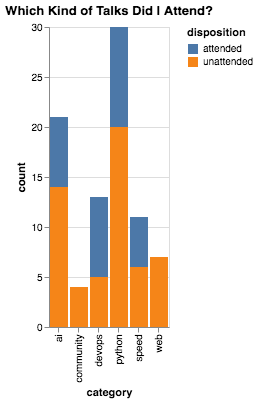

In [10]:
# Altair - https://altair-viz.github.io/gallery/index.html

import altair as alt
alt.renderers.enable('notebook')

alt.Chart(chart_source).mark_bar().encode(
    x='category',
    y='count',
    color='disposition',
    order=alt.Order('disposition', sort='descending'),
).properties(
    title='Which Kind of Talks Did I Attend?'
)